# Classificação de campanha de marketing

Um dos principais desafios de qualquer instituição (seja ela pública ou privada) é saber se determinada campanha funciona ou não e para que essa campanha tenha sucesso a melhor coisa a se fazer é identificar quais os indivíduos que estão mais propensos a aderi-lá. Quando uma instituição querer atingir objetivos estratégicos, ela utiliza-se de meios de divulgação e do seus relacionamento com o seu público.

Existem vários tipos de campanhas: promocionais, de lançamento, de sustentação, de oportunidade sazonal, sociais/educativas, de revisão de marca, etc. Todos os tipos de campanhas ditas anteriormente podem estar englobadas em uma campanha de *marketing* e são sempre direcionadas para um público alvo de quem está executando a campanha, por esse motivo devem ser feitas de forma perfeita para gerar o estreitamento entre a empresa e sua audiência.

Porém, como foi dito, é necessário identificar bem o público-alvo. No nosso caso, nesse projeto, iremos tentar identificar quais os são os indivíduos que são mais propensos a aderir a campanha de *marketing* feita por uma instituição bancária portuguesa. A campanha foi feita por meio de *marketing* direto (telefonemas) para oferecer o serviço de depósito a prazo (que será nossa variável *target*).

Um depósito a prazo é um produto bancário que pressupõe a entrega de fundos a uma instituição de crédito, que fica obrigada a restituir esses fundos no final de um período de tempo acordado e ao pagamento de uma remuneração, designada de juro. Os depósitos a prazo são supervisionados pelo Banco de Portugal.

Nesse projeto iremos usar os dados dessa campanha de *marketing* para treinar e testar um modelo que classificará o resultado da campanha, que será um resultado binário (se o cliente assinou ou não o depósito a prazo oferecido pelo banco).


## Descrição dos dados

Os dados podem ser obtidos [aqui](https://archive.ics.uci.edu/ml/datasets/bank+marketing).

**1)** **age** (idade): Idade do cliente;

**2)** **job** : tipo de trabalho do cliente (categorias: 'admin.','blue-collar','entrepreneur','management','retired','self-employed','services','student','technician','unemployed','unknown');

**3)** **marital**: estado civil (categorias: 'divorced','married','single','unknown'; note: 'divorced' significa divorciado ou viúvo);

**4)** **education**: educação do cliente ('basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown');

**5)** **default**:tem crédito no padrão? (categórico: 'no', 'sim','desconhecido');

**6)** **balance**: valor que o cliente tem depositado no banco;

**7)** **housing**: Possui casa ? (categorias : 'no','yes','unknown');

**8)** **loan**: Tem empréstimo pessoal ? (categorias : 'no','yes','unknown');

**9)** **contact**: tipo de comunicação de contato (categórico: 'celular', 'telefone');

**10)** **day**: Último dia da semana do contato (categórico:' mon ',' ter ',' qua ',' qui ',' sex ');

**11)** **month**: Mês do último contato do ano (categórico: 'jan', 'feb', ' mar ', ...,' nov ',' dec ');

**12)** **duration**: Duração do último contato, em segundos (numérico). Nota importante: esse atributo afeta muito o destino de saída (por exemplo, se duration = 0, então y = 'no'). No entanto, a duração não é conhecida antes de uma chamada ser realizada. Além disso, após o final da chamada, y é obviamente conhecido. Portanto, essa entrada deve ser incluída apenas para fins de referência e deve ser descartada se a intenção for ter um modelo preditivo realista;

**13)** **campaign**:  Número de contatos realizados durante esta campanha e para este cliente (numérico, inclui o último contato);

**14)** **pdays**: Número de dias que passaram após o último contato do cliente de uma campanha anterior (numérico; 999 significa que o cliente não estava previamente contactado);

**15)** **previous**: Número de contatos realizados antes desta campanha e para este cliente (numérico)

**16)** **poutcome**: Resultado da campanha de marketing anterior (categórica: 'falha', 'inexistente', 'sucesso')

**17)** **deposit**: Assinou o depósito a prazo ? (categorias: 'no' e 'yes')

## Etapas

**1) Análise Exploratória dos dados**

**2) Tratar dos dados**

**3) Separar os dados entre treino e teste**

**4) Criar do modelo de classificação**

**5) Avaliação do modelo**

**6) Salvar o modelo**

# Importando Bibliotecas

In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import pickle
%matplotlib inline
pd.set_option("display.max_columns",200)
plt.style.use('ggplot')

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import  NearMiss
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve

## Importação dos dados

In [123]:
bank=pd.read_csv('bank.csv')

## Análise preliminar dos dados

Abaixo podemos ver as 5 primeiras linhas do nosso *dataset* e em seguida as 5 últimas linhas.

In [124]:
display(bank.head())
display(bank.tail())

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


Aqui geramos 2 describes, onde:

1) O primeiro possui estatísticas descritivas das colunas que são de valores numéricos;

2) O segundo describe mostra resultados das colunas que são de objetos.

In [125]:
display(bank.describe())
display(bank.describe(include=['O']))

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2566,6351,5476,10994,5881,9702,8042,2824,8326,5873


Nenhuma coluna possui *missing values*.

In [126]:
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

Temos 7 colunas que são de valores inteiros e 10 colunas que são de objetos. Todas as colunas estão preenchidas.

In [127]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


Valores únicos de cada coluna.

In [128]:
bank.nunique()

age            76
job            12
marital         3
education       4
default         2
balance      3805
housing         2
loan            2
contact         3
day            31
month          12
duration     1428
campaign       36
pdays         472
previous       34
poutcome        4
deposit         2
dtype: int64

# Análise exploratória de dados

Vamos primeiro olhar a variável *target* que é *deposit* : Cerca de 5873 (52.62%) clientes não assinaram o depósito a prazo e cerca de 5289 (47.38%) assinaram o depósito a prazo. Essa variável não está desbalanceada (diferença excessiva entre as classes da variável), por isso não teremos que nos preocupar em fazer um *oversampling* ou um *undersampling* das classes.

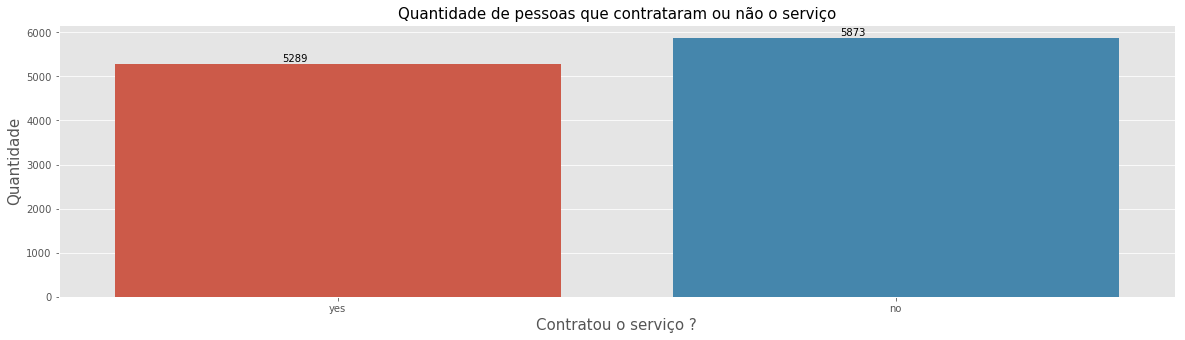

In [129]:
plt.figure(figsize=(20,5))
dx=sns.countplot(x='deposit',data=bank)
plt.xlabel('Contratou o serviço ?',size=15)
plt.ylabel('Quantidade',size=15)
plt.title('Quantidade de pessoas que contrataram ou não o serviço',size=15)
for p in dx.patches:
    dx.annotate((p.get_height()), (p.get_x()+0.3, p.get_height()+50))
plt.show()

Dos clientes que foram alvos da campanha, a grande maioria trabalham na área de gestão ou são trabalhadores manuais, técnicos e de áreas administrativas. Podemos ver isso nos gráficos abaixo.

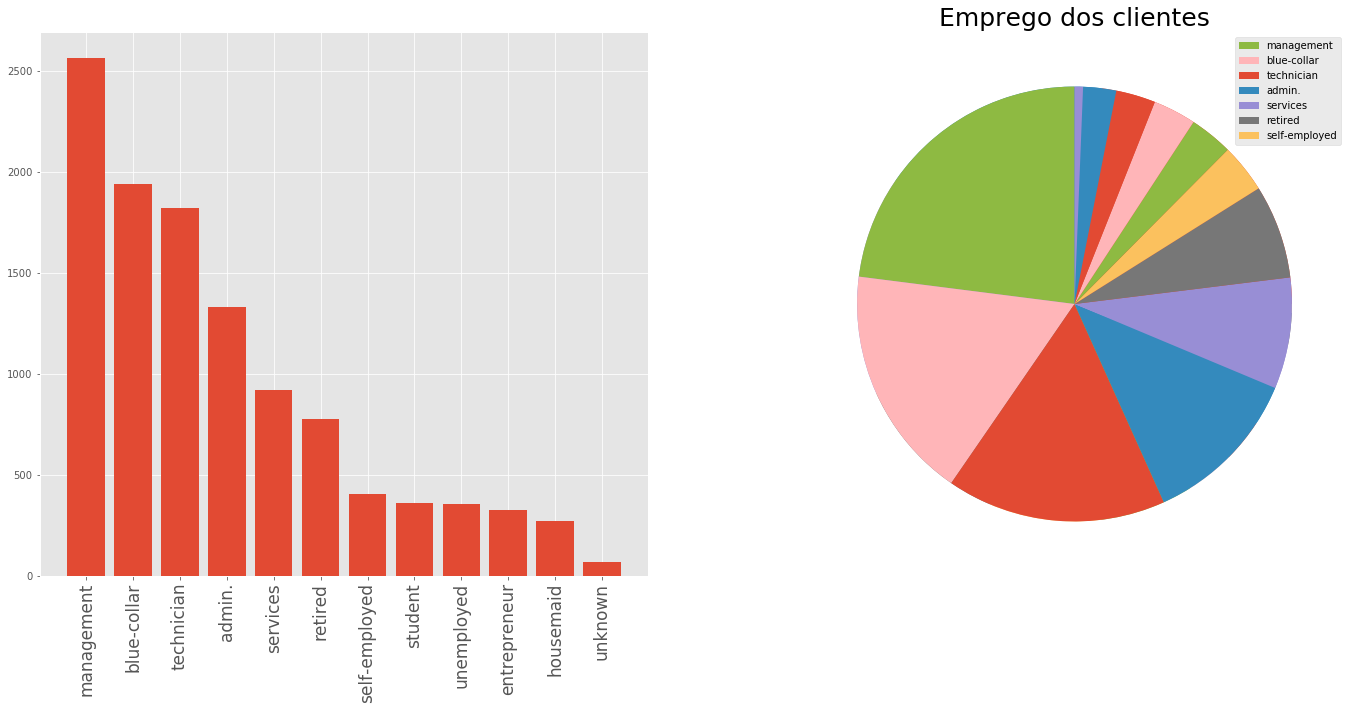

In [130]:
sizes = bank['job'].value_counts()
labels=r'management',r'blue-collar',r'technician',r'admin.',r'services',r'retired',r'self-employed',
r'student',r'unemployed',r'entrepreneur',r'housemaid',r'unknown'


plt.figure(figsize=(24,10))
plt.style.use("ggplot")


plt.subplot(1, 2, 1)
plt.bar(bank['job'].value_counts().index,bank['job'].value_counts().values)
plt.xticks(rotation='90',size=17)

plt.subplot(1, 2, 2)
plt.pie(bank['job'].value_counts())
patches, texts = plt.pie(sizes, startangle=90)
plt.legend(patches, labels,loc='best')
plt.title('Emprego dos clientes',size=25)
plt.show()

O mesmo gráfico anterior, mas usando a biblioteca *plotly*.

Podemos ver de forma mais discriminada que 3 classes de trabalhadores (das 12) correspondem por quase 60% dos clientes contatados pelo banco nessa campanha.

In [131]:
labels = ['management','blue-collar','technician','admin.','services','retired','self-employed',
          'student','unemployed','entrepreneur','housemaid','unknown']
plt.figure(figsize=(3,3))
fig = go.Figure(data=[go.Pie(labels=labels, values=bank['job'].value_counts().tolist())])
fig.show()

<Figure size 216x216 with 0 Axes>

A maior parte dos clientes (56.9%) são casados, solteiros são 31.5% e divorciados são 11.6%.

In [132]:
labels = ['married','single','divorced']
plt.figure(figsize=(3,3))
fig = go.Figure(data=[go.Pie(labels=labels, values=bank['marital'].value_counts().tolist())])
fig.show()

<Figure size 216x216 with 0 Axes>

A maior parte dos clientes (quase 50%) é composta por pessoas com ensino secundário, ou seja, equivalente ao ensino médio e em seguida 33% com ensino superior.

In [133]:
labels = ['secondary','tertiary','primary','unknown']
fig = go.Figure(data=[go.Pie(labels=labels, values=bank['education'].value_counts().tolist())])
fig.show()

A maioria dos clientes do banco foram contatados de 1 a 6 vezes.

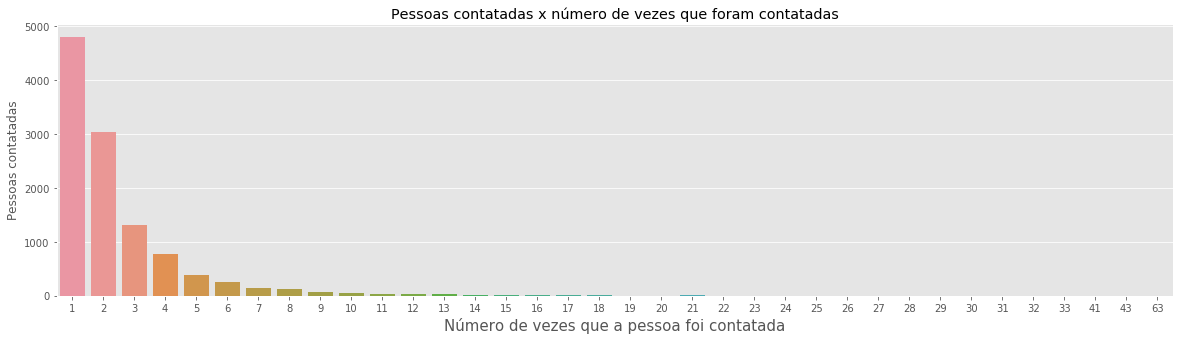

In [134]:
plt.figure(figsize=(20,5))
ax=sns.countplot(x=bank['campaign'])
plt.xlabel('Número de vezes que a pessoa foi contatada',size=15)
plt.ylabel('Pessoas contatadas')
plt.title('Pessoas contatadas x número de vezes que foram contatadas')
plt.show()



Pessoas da terceira idade possuem um balanço maior que pessoas de menos idade.

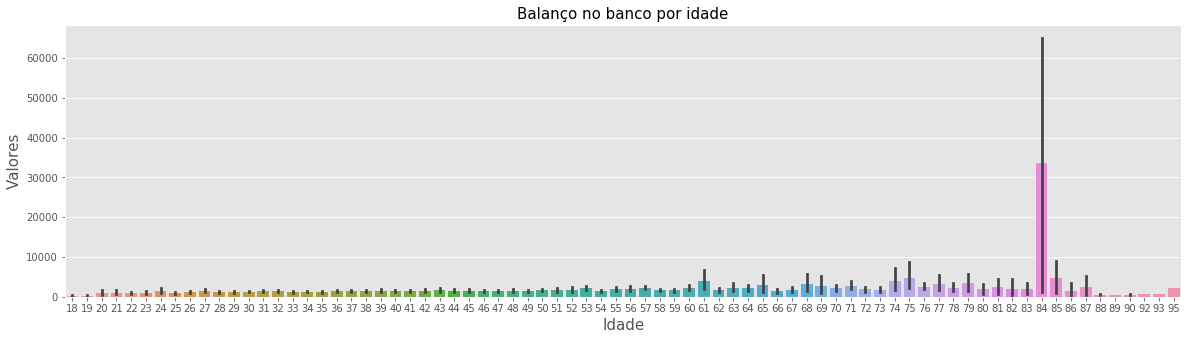

In [135]:
plt.figure(figsize=(20,5))
sns.barplot(y='balance',x='age',data=bank)
plt.xlabel('Idade',size=15)
plt.ylabel('Valores',size=15)
plt.title('Balanço no banco por idade',size=15)
plt.show()

A maior parte das pessoas que foram contadas na campanha são Administradores, técnicos (área técnica), da área de serviços, da área de gestão, aposentados e de clarinho azul (membro da classe trabalhadora que normalmente realiza trabalho manual).

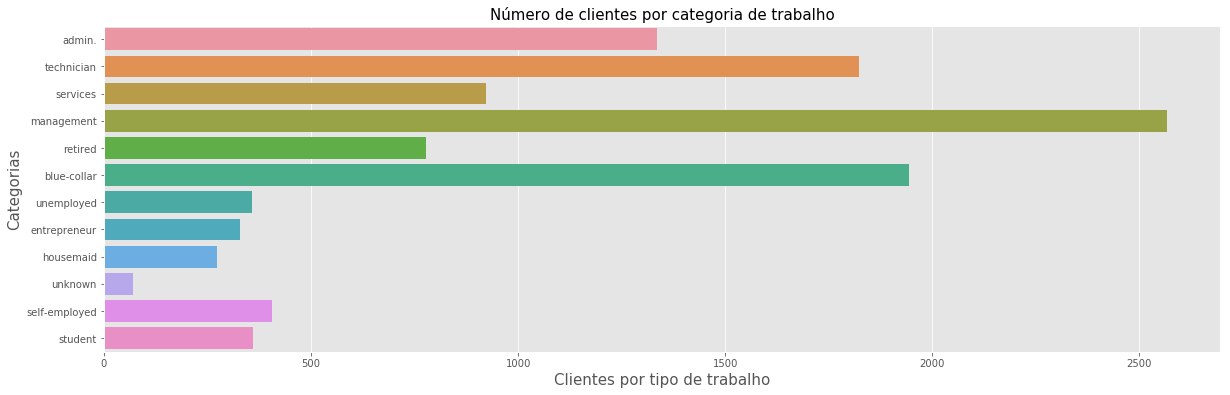

In [136]:
plt.figure(figsize=(20,6))
sns.countplot(y='job',data=bank)
plt.xlabel('Clientes por tipo de trabalho',size=15)
plt.ylabel('Categorias',size=15)
plt.title('Número de clientes por categoria de trabalho',size=15)
plt.show()

Em todos os níveis de educação, aqueles que não possuem casa possuem um balanço maior do que aqueles que possuem casa. Dentre os que assinaram depósito, aqueles que mais assinaram fizeram curso superior (*tertiary*).

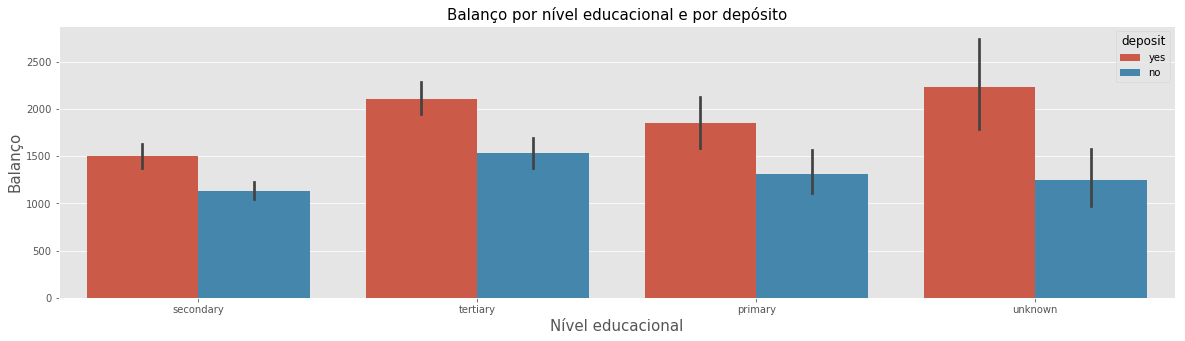

In [137]:
plt.figure(figsize=(20,5))
sns.barplot(x='education',y='balance',hue='deposit',data=bank)
plt.xlabel('Nível educacional',size=15)
plt.ylabel('Balanço',size=15)
plt.title('Balanço por nível educacional e por depósito',size=15)
plt.show()

Pessoas que assinaram o depósito a prazo possuem balanços menores do que aqueles que não assinaram.

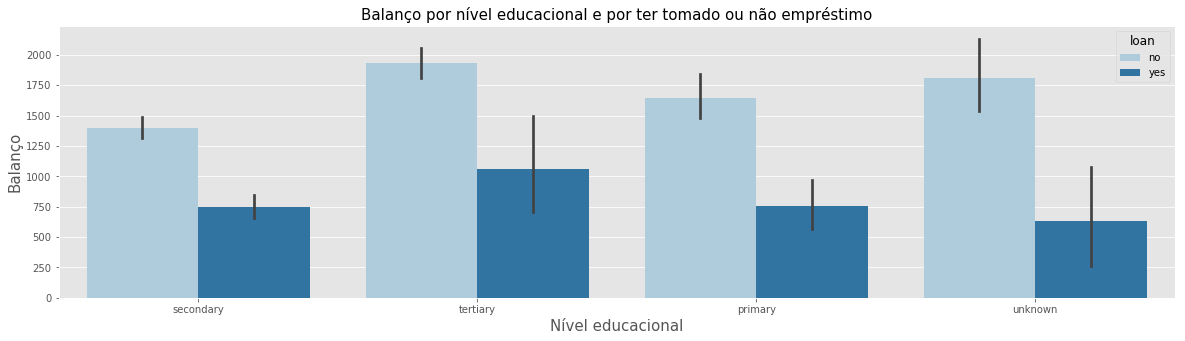

In [138]:
plt.figure(figsize=(20,5))
sns.barplot(x='education',y='balance',hue='loan',data=bank,palette='Paired')
plt.xlabel('Nível educacional',size=15)
plt.ylabel('Balanço',size=15)
plt.title('Balanço por nível educacional e por ter tomado ou não empréstimo',size=15)
plt.show()

Por classe de trabalhador, com exceção dos estudantes, aqueles que aceitaram o depósito a prazo possuem balanços maiores do que aqueles que não aceitaram.

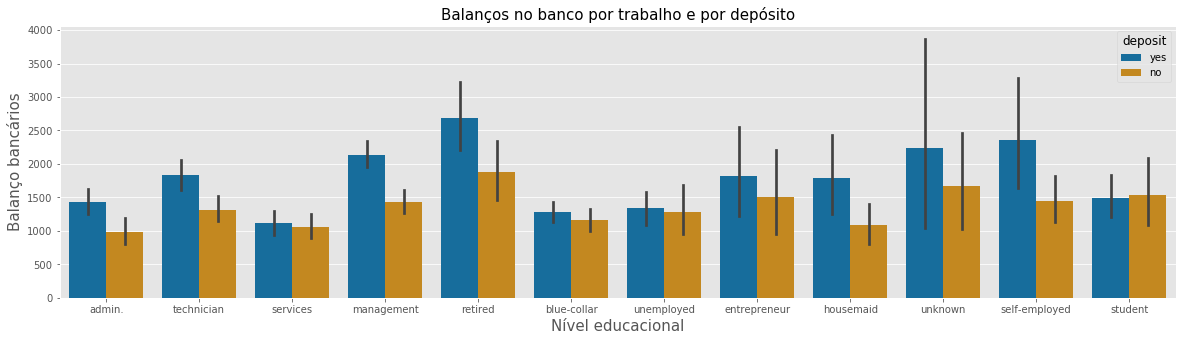

In [139]:
plt.figure(figsize=(20,5))
sns.barplot(x='job',y='balance',hue='deposit',data=bank,palette='colorblind')
plt.xlabel('Nível educacional',size=15)
plt.ylabel('Balanço bancários',size=15)
plt.title('Balanços no banco por trabalho e por depósito',size=15)
plt.show()

Pessoas com ensino *secondary* (equivalente ao ensino médio) e *tertiary* (superior) foram as que mais contrataram o serviço.

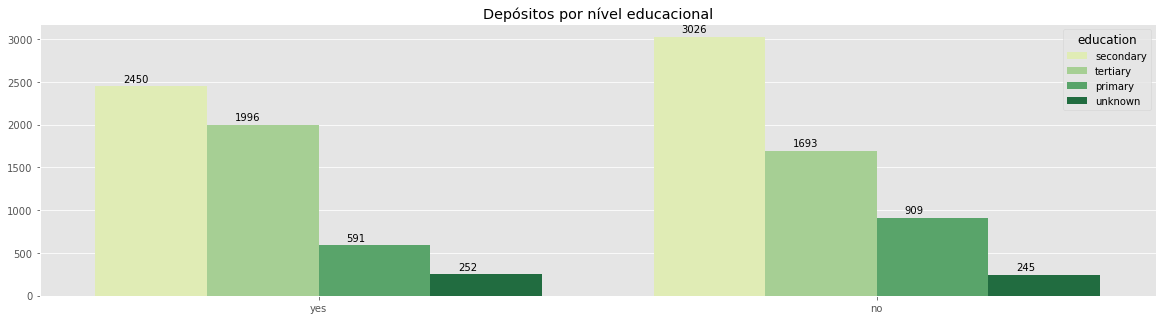

In [140]:
plt.figure(figsize=(20,5))
bx=sns.countplot(x='deposit',data=bank,hue='education',palette='YlGn')
plt.xlabel('')
plt.ylabel('')
plt.title('Depósitos por nível educacional')
for p in bx.patches:
    bx.annotate((p.get_height()), (p.get_x()+0.05, p.get_height()+50))
plt.show()

Por estado civil: casados e solteiros foram os que mais contrataram. Mas dentre a classe de casados, a maior parte não assinou o depósito a prazo.

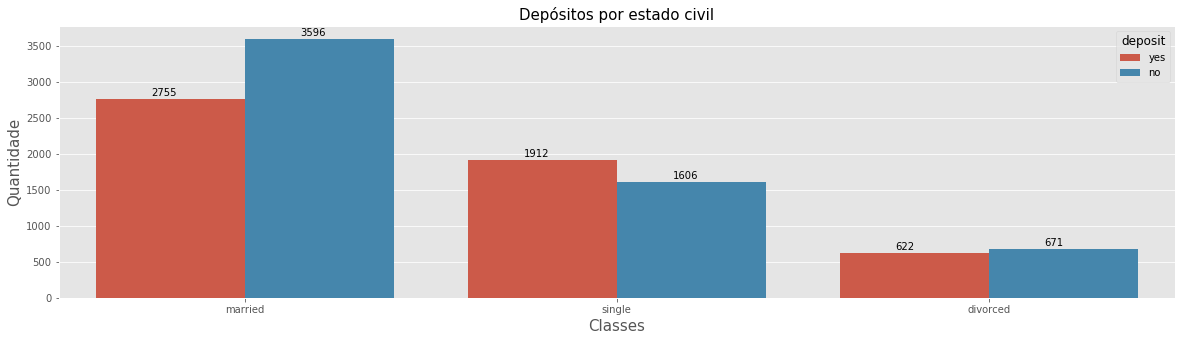

In [141]:
plt.figure(figsize=(20,5))
bx=sns.countplot(x='marital',data=bank,hue='deposit')
plt.xlabel('Classes',size=15)
plt.ylabel('Quantidade',size=15)
plt.title('Depósitos por estado civil',size=15)
for p in bx.patches:
    bx.annotate((p.get_height()), (p.get_x()+0.15, p.get_height()+50))
plt.show()

Podemos ver que a distribuição não apresenta ser uma normal. Os dados se concentram entre 30 a 60 anos de idade.

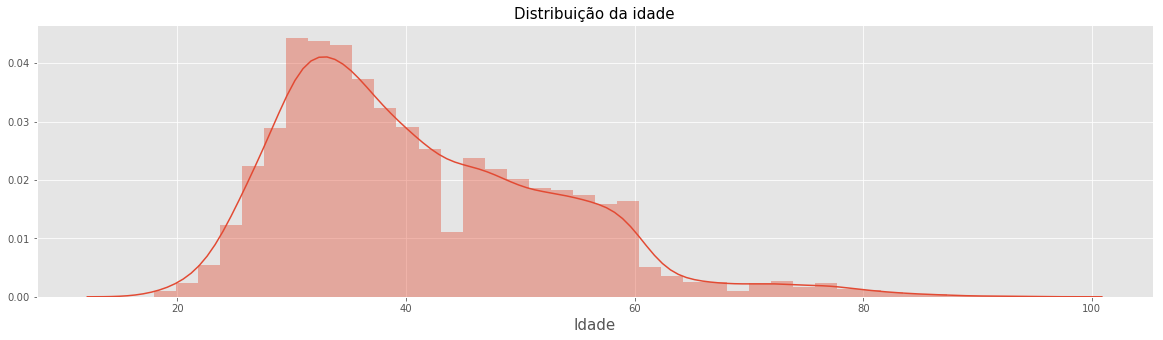

In [142]:
plt.figure(figsize=(20,5))
sns.distplot(bank['age'],bins=40)
plt.xlabel('Idade',size=15)
plt.title('Distribuição da idade',size=15)
plt.show()

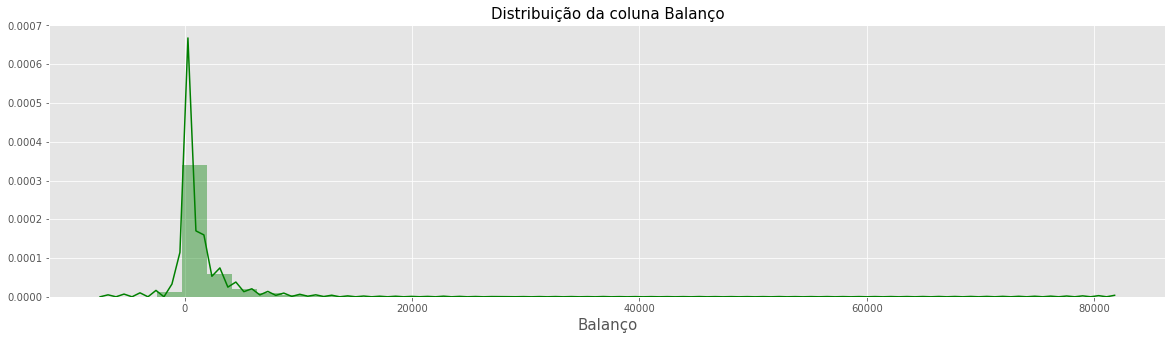

In [143]:
plt.figure(figsize=(20,5))
sns.distplot(bank['balance'],bins=40,color='g')
plt.xlabel('Balanço',size=15)
plt.ylabel('')
plt.title('Distribuição da coluna Balanço',size=15)
plt.show()

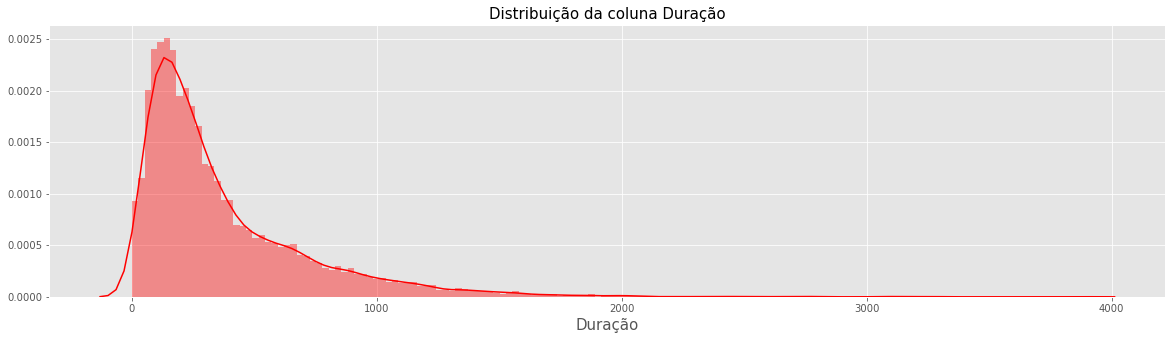

In [144]:
plt.figure(figsize=(20,5))
sns.distplot(bank['duration'],bins=150,color='r')
plt.xlabel('Duração',size=15)
plt.ylabel('')
plt.title('Distribuição da coluna Duração',size=15)
plt.show()

Na campanha a maior parte das pessoas contatadas foram por celular.

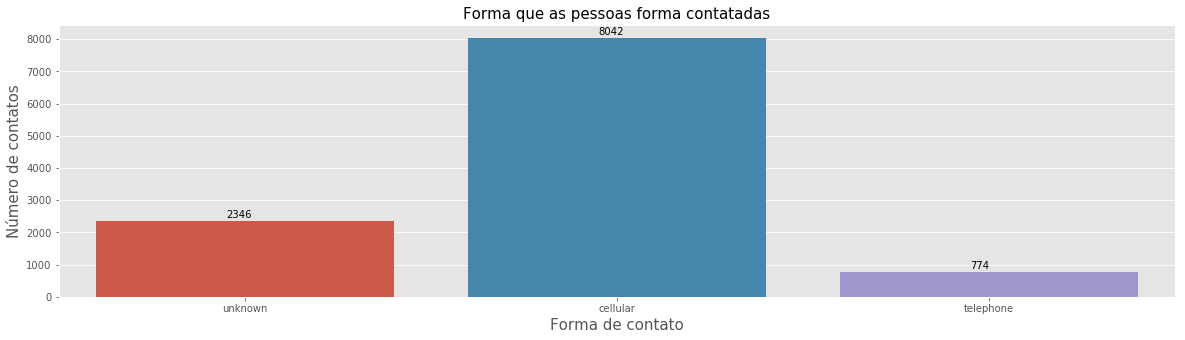

In [145]:
plt.figure(figsize=(20,5))
cx=sns.countplot(x='contact',data=bank)
plt.ylabel('Número de contatos',size=15)
plt.xlabel('Forma de contato',size=15)
plt.title('Forma que as pessoas forma contatadas',size=15)
for p in cx.patches:
    cx.annotate((p.get_height()), (p.get_x()+0.35, p.get_height()+100))
plt.show()

Para aqueles que assinaram o depósito a prazo no banco, a maioria foi contatada por celular, por métodos 'não conhecidos' a maior parte não contratou o serviço; e por telefone os resultados foram praticamente os mesmos.

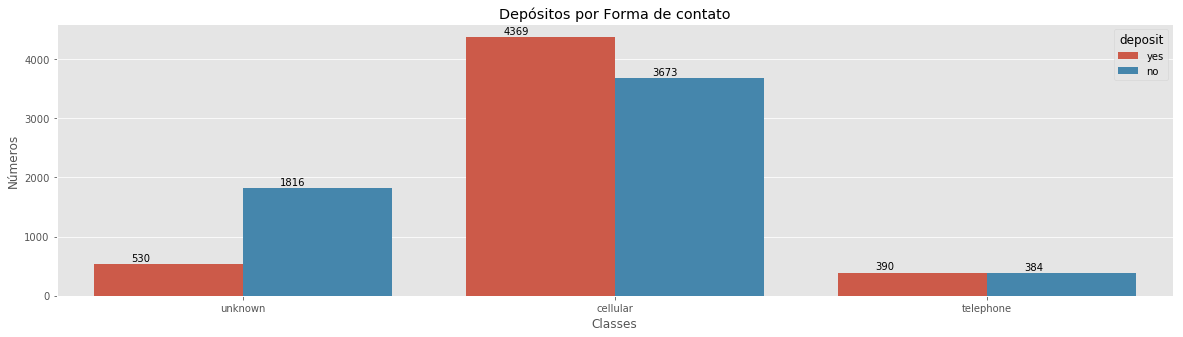

In [146]:
plt.figure(figsize=(20,5))
bx=sns.countplot(x='contact',hue='deposit',data=bank)
plt.xlabel('Classes')
plt.ylabel('Números')
plt.title('Depósitos por Forma de contato')
for p in bx.patches:
    bx.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+50))
plt.show()

A maior parte dos que assinaram o serviço foram do mês de maio. De maio a novembro há uma queda que se reverte a partir de janeiro.

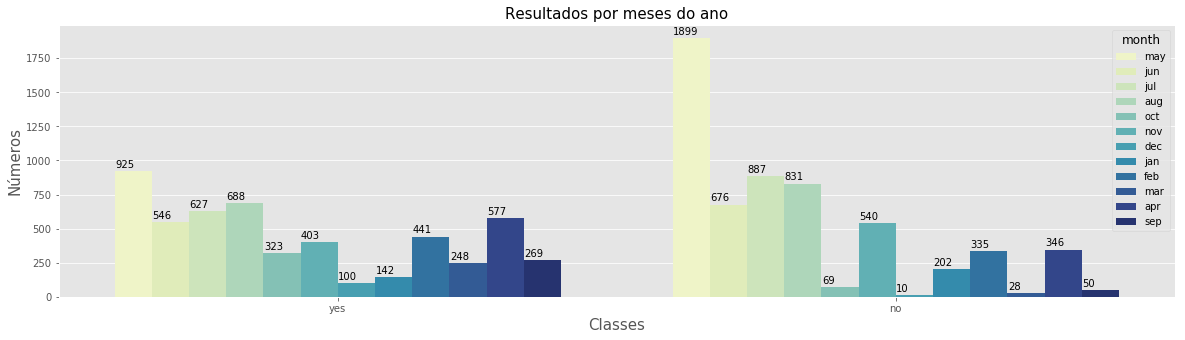

In [147]:
plt.figure(figsize=(20,5))
bx=sns.countplot(x='deposit',hue='month',data=bank,palette='YlGnBu')
plt.xlabel('Classes',size=15)
plt.ylabel('Números',size=15)
plt.title('Resultados por meses do ano',size=15)
for p in bx.patches:
    bx.annotate((p.get_height()), (p.get_x()+0.001, p.get_height()+25))
plt.show()

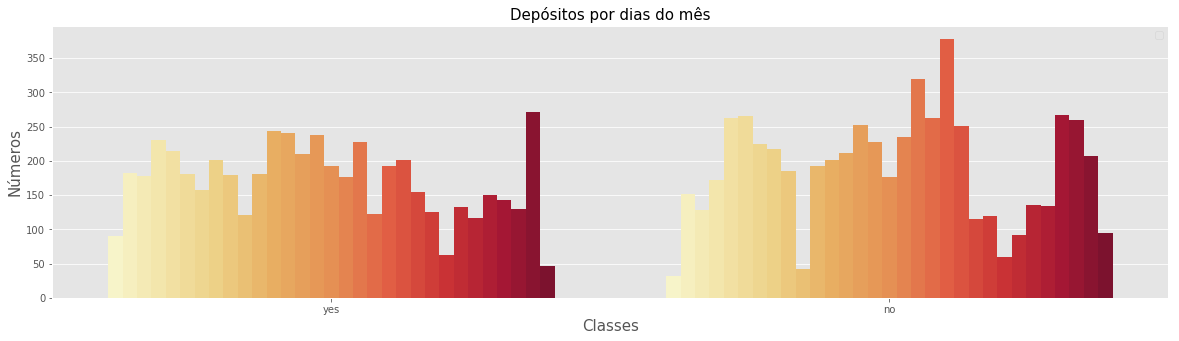

In [148]:
plt.figure(figsize=(20,5))
bx=sns.countplot(x='deposit',hue='day',data=bank,palette='YlOrRd')
plt.xlabel('Classes',size=15)
plt.ylabel('Números',size=15)
plt.title('Depósitos por dias do mês',size=15)
plt.legend("")
plt.show()

Aqueles que assinaram o depósito a prazo, marjotitariamente, não possuem crédito padrão.

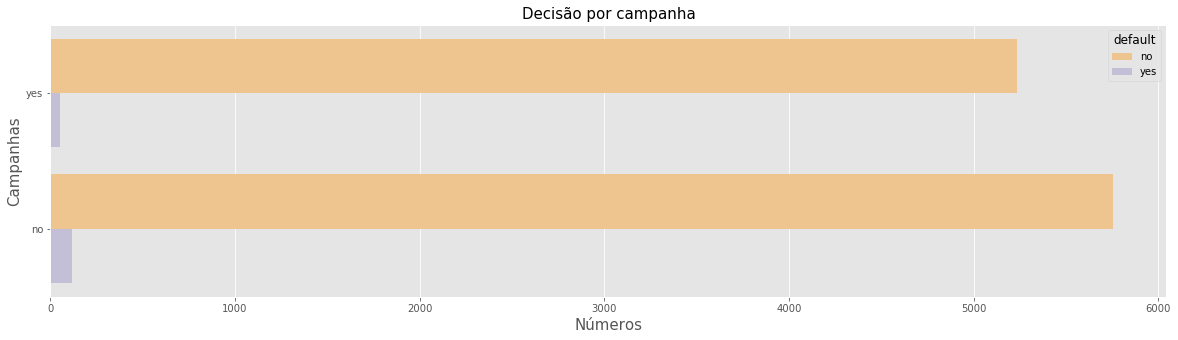

In [149]:
plt.figure(figsize=(20,5))
bx=sns.countplot(y='deposit',hue='default',data=bank,palette='PuOr')
plt.ylabel('Campanhas',size=15)
plt.xlabel('Números',size=15)
plt.title('Decisão por campanha',size=15)
plt.show()

O tempo de duração de ligação de contato está mais concentrado em pessoas com balanço menor que US$ 20000 e foram feitas mais ligações para pessoas dessa faixa de balanço. Pessoas que contrataram o serviço de depósito a prazo receberam contato por um tempo maior.

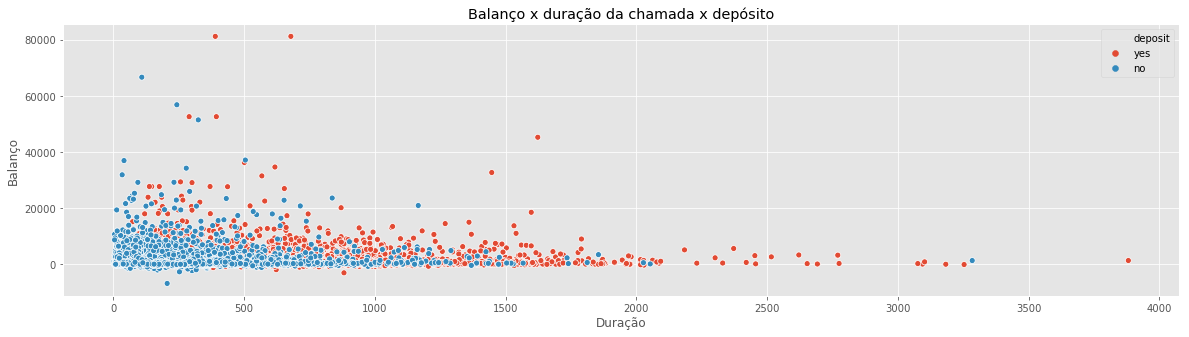

In [150]:
plt.figure(figsize=(20,5))
sns.scatterplot(x='duration',y='balance',hue='deposit',data=bank,color='g')
plt.xlabel('Duração')
plt.ylabel('Balanço')
plt.title('Balanço x duração da chamada x depósito')
plt.show()

Aqueles que assinaram o depósito a prazo, a grande maioria não se sabe qual o resultado na campanha anterior.

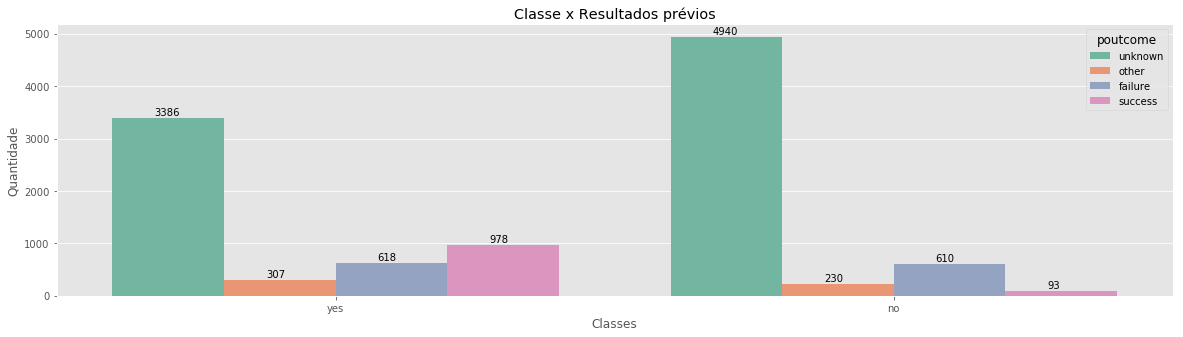

In [151]:
plt.figure(figsize=(20,5))
cx=sns.countplot(x='deposit',hue='poutcome',data=bank,palette='Set2')
plt.xlabel('Classes')
plt.ylabel('Quantidade')
plt.title('Classe x Resultados prévios')
for p in cx.patches:
    cx.annotate((p.get_height()), (p.get_x()+0.075, p.get_height()+50))
plt.show()

## Tratamento dos dados

Vamos agora tratar os dados para que possam ser usados para treinar o modelo de *machine learning* selecionado.

In [152]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [153]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


Selecionando as colunas categóricas.

In [154]:
bank[['job','marital','education','default','housing','loan','contact','month','poutcome','deposit']].head()

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
0,admin.,married,secondary,no,yes,no,unknown,may,unknown,yes
1,admin.,married,secondary,no,no,no,unknown,may,unknown,yes
2,technician,married,secondary,no,yes,no,unknown,may,unknown,yes
3,services,married,secondary,no,yes,no,unknown,may,unknown,yes
4,admin.,married,tertiary,no,no,no,unknown,may,unknown,yes


Vamos primeiro tratar as colunas que são categóricas. Usaremos o método *label encoder*.

Instaciemos o *label encoder* e vamos criar uma lista com os nomes das colunas categóricas.

In [155]:
le=LabelEncoder()

lista=['job','marital','education','default','housing','loan','contact','month','poutcome','deposit']

Vamos usar um *loop for* para fazer o *label encoder* para todas essas colunas, ao invés de fazermos uma por uma.

In [156]:
for i in lista:
    bank[i]=le.fit_transform(bank[i])

Podemos ver abaixo a transformação feita nos dados.

In [157]:
bank[['job','marital','education','default','housing','loan','contact','month','poutcome','deposit']].head()

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
0,0,1,1,0,1,0,2,8,3,1
1,0,1,1,0,0,0,2,8,3,1
2,9,1,1,0,1,0,2,8,3,1
3,7,1,1,0,1,0,2,8,3,1
4,0,1,2,0,0,0,2,8,3,1


Vamos excluir as colunas *pdays*, *month* e *day*, pois não iremos usá-las.

In [158]:
bank=bank.drop(['pdays','month','day'],axis=1)

Agora, por fim, padronizaremos as colunas idade (*age*), balanço (*balance*) e duração (*duration*). Usaremos a padronização, pois é mais adequada para problemas de classificação.

In [159]:
lista2=['age','balance','duration']

for j in lista2:
    bank[j]=(bank[j]-bank[j].mean())/bank[j].std()

## Separando dados de treino e teste

Vamos separar os dados entre treino e teste. A base de treino, como o próprio nome já diz, será usada para treino o algoritmo e a de teste para comparar os resultados.

Nossa base de dados é uma base grande, com cerca de 11162 observações.

In [180]:
bank.shape

(11162, 14)

Aqui iremos separar o que serão *features*, ou seja, as características e o que é *target* (alvo). Logo teremos 13 colunas de *features* e uma apenas de *target* que é se o cliente aderiu ou não ao serviço de depósito a prazo.

Abaixo vamos fazer essa separação.

In [181]:
X=bank.drop('deposit',axis=1)
y=bank.deposit

Visualizando o dataset com as *features*.

In [182]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,previous,poutcome
0,1.491438,0,1,1,0,0.252514,1,0,2,1.930139,1,0,3
1,1.239620,0,1,1,0,-0.459953,0,0,2,3.154470,1,0,3
2,-0.019470,9,1,1,0,-0.080157,1,0,2,2.929770,1,0,3
3,1.155681,7,1,1,0,0.293749,1,0,2,0.596339,1,0,3
4,1.071742,0,1,2,0,-0.416858,0,0,2,0.867132,2,0,3


Visualizando a coluna de classe.

In [183]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: deposit, dtype: int32

Mesmo as classes não estando desbalanceadas, vamos aplicar o algoritmo *Smote* que vai igualar as classes para que tenham o mesmo número de observações, criando observações artificiais. Visto que a diferença não é muito significativa esse procedimento não irá influenciar muito o modelo na hora das previsões.

In [184]:
smt=SMOTE()
X,y=smt.fit_sample(X,y)

Agora sim, iremos utilizar o *train_test_split* para separar os dados de treino e de teste.

In [185]:
X_treino,X_teste,y_treino,y_teste=train_test_split(X,y,random_state=42)

Dimensões de cada uma das novas bases separadas entre treino e teste.

1) *X_treino* possui 8371 linhas e 13 colunas;

2) *X_teste* possui 2791 linhas e 13 colunas;

3) *y_treino* possui 8371 linhas e 1 coluna;

4) *y_teste* possui 2791 linhas e 1 coluna.

In [186]:
X_treino.shape,X_teste.shape,y_treino.shape,y_teste.shape

((8809, 13), (2937, 13), (8809,), (2937,))

## *Baseline* do Projeto.

Antes de prosseguirmos com o treinamento do modelo é bom criarmos uma *baseline*. Podemos definir a *baseline* de várias formas, uma delas, por exemplo, é o percentual de pessoas que assinaram o depósito a prazo que foram em torno de 47.38%. 

Outra forma é usar o módulo *DummyClassifier*, que é classificador que faz previsões usando regras simples. Esse classificador é útil como uma linha de base simples para comparar com outros classificadores (reais).

Instanciando o modelo e treinando o modelo.

In [200]:
dummy = DummyClassifier(strategy='uniform', random_state=42)
dummy.fit(X_treino, y_treino)

DummyClassifier(constant=None, random_state=42, strategy='uniform')

Agora vamos obter o desempenho desse classificador.

Obtemos um resultado de 50.32%, um pouco menor do que usarmos uma moeda no cara ou coroa para classificarmos e um pouco maior que o percentual de clientes que aceitaram o serviço.

In [202]:
dummy.score(X_teste, y_teste)*100

50.32345931222336

## Modelo de Classificação Gradiente Boosting

Usaremos o modelo *Gradient Boosting* (ou *Gradient Tree Boosting*) para classificação, que é um modelo do tipo árvore (separa os dados criando nós e folhas). Esse modelo fornece e métodos para classificação e regressão por meio de árvores de decisão incrementadas por gradiente. É bastante eficiente e pode ser usado em problemas de regressão e de classificação (binária ou multiclasse).

Modelos do tipo *Gradient Tree Boosting* constroem árvores uma de cada vez, onde cada nova árvore ajuda a corrigir erros cometidos pela árvore previamente treinada (muito semelhante ao modelo *Random Forest*). A cada árvore adicionada, o modelo se torna ainda mais expressivo. O treinamento do *GBDT* geralmente leva mais tempo devido ao fato de que as árvores são construídas sequencialmente. No entanto, os resultados do *benchmark* mostraram que o *GBDT* aprende melhor do que modelos como a *Random Forests*.

Sobre modelos do tipo árvore você pode saber um pouco mais nesse projeto [aqui](https://github.com/IvanildoBatista/Data-science/blob/master/ProjetoDiabetes/Classificando%20ocorr%C3%AAncia%20de%20diabetes%20com%20Machine%20Learning.ipynb).

Vamos instanciar o modelo.

In [247]:
bank=GradientBoostingClassifier()

Vamos treinar o modelo.

In [248]:
bank.fit(X_treino,y_treino)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Vamos gerar as previsões do modelo *Gradient Boosting*.

In [249]:
#Gerando as previsões do modelo com os dados de teste
y_pred=bank.predict(X_teste)

## Avaliação do modelo

Agora nessa etapa analisaremos os resultados do modelo *Gradient Boosting* por meio de métodos e métricas de avaliação para modelos de classificação, sendo:

1) Matriz de confusão;

2) Acurácia do modelo;

3) *Training score* e *Testing score*;

4) Métricas de avaliação (*precision, recall e f1-score*);

5) Curva *ROC* e *AUC*.

### Matriz de confusão

Trata-se de uma tabela onde serão colocados os resultados cruzados dos valores reais e valores preditos pelo modelo. Na diagonal principal dessa tabela encontram os valores dos *verdadeiro positivos* e *verdadeiros negativos*. No nosso caso os nossos *verdadeiros positivos* referem-se a classe 0 (não aderiu ao serviço de depósito à prazo) e o modelo acertou 1153 e errou (ou confundiu) 285 para a classe 1. E o nosso *verdadeiro negativo* é a nossa classe 1, que o modelo acertou 1251 e errou (confundiu) 228 para a classe 0. Esses valores na diagonal secundária (285 e 228) são os nossos *falsos* (respectivamente *positivos* e *negativos*).

Como em classificação binária está se classificando algo como *sucesso/fracasso*, *derrota/vitória*, *cura/morte* essa nomenclatura de *verdadeiro positivo* e *verdadeiro negativo* faz mais sentido.

Abaixo vemos a nossa matriz de confusão gerada.

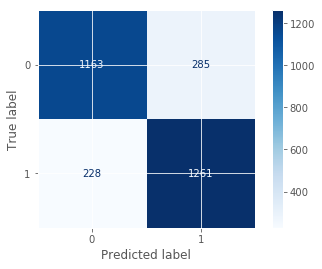

In [250]:
disp=plot_confusion_matrix(bank,X_teste,y_teste,cmap='Blues',values_format='.5g')

### Acurácia do modelo

Uma métrica importante é a acurácia ou quanto o modelo acertou somando os resultados de todas as classes.

No geral nosso modelo acertou 82.57% dos resultado, o que é um bom desempenho desse modelo. Comparando com a nossa *baseline* (50.32%) nosso modelo teve um ótimo desempenho.

In [242]:
print("Acurácia do modelo é de:",round(accuracy_score(y_teste,y_pred)*100,3))

Acurácia do modelo é de: 82.567


### Acurácia com validação cruzada

Uma forma de analisar o desempenho do modelo para saber se ele está generalizando bem é usar o *cross validation*. Basicamente o *cross validation* é um método em que vamos dividir a nossa base de dados em um determinado número de partes (chamaremos esse número de partes de *i*). 

Suponha que dividimos nossa base de dados em 10 partes, 9 serão usadas para treinar o modelo e a parte restante será usada para testar o desempenho do modelo treinado; porém não faremos isso uma única vez, mas 10 vezes. Teremos 10 formas de treinarmos e testarmos nosso modelo e, após esse procedimento, iremos tirar a média das acurácias de cada um dos modelos.

Iremos fazer isso com um *cross validation* igual a 10.

Veja que a nossa acurácia com *cross validation* caiu um pouco, de 82.567 para 81.602.

In [243]:
resultado=cross_val_predict(bank,X,y,cv=10)
print("Acurácia do modelo com Validação cruzada:", round(accuracy_score(y,resultado)*100,3))

Acurácia do modelo com Validação cruzada: 81.602


### *Training score* e *Testing score*

Outra forma de analisar o desempenho do nosso modelo é aplicando o modelo treinado aos dados treino e aplicá-lo aos dados de teste e, para cada um, extrair os *score*. Se a diferença entre o *Training score* e *Testing score* for muito grande podemos ter uma evidência de *overfitting* (quando o modelo se ajusta de forma quase prefeita aos dados de treino, é como se o modelo *decorasse* os dados) ou de *underfitting* (quando o modelo aprende pouco ou não aprende com os dados de treino).

In [252]:
print("O training score do modelo é:",round(bank.score(X_treino,y_treino)*100,3))
print("O testing score do modelo é:",round(bank.score(X_teste,y_teste)*100,3))

print("A diferença entre o training score e o testing score é:",round(bank.score(X_treino,y_treino)*100,3) -
      round(bank.score(X_teste,y_teste)*100,3))

O training score do modelo é: 83.846
O testing score do modelo é: 82.533
A diferença entre o training score e o testing score é: 1.3130000000000024


A diferença entre o *Training score* e *Testing score* é pequena, logo descartamos qualquer evidência de *overfitting* e descartamos evidência de *underfitting*, pois os *score* são bastantes altos (acima dos 80 pontos).

### Métricas de avaliação

Agora vamos analisar as métricas de avaliação para cada uma das classes (0 e 1). A principais métricas usadas são a precisão, *recall* e o *f1-score* (a diferença dessas métricas para a acurácia é que a acurácia mede o desempenho geral do modelo e essas o desempenho por classe).

1) **precisão** : A precisão é o número de itens corretamente identificados como positivos do total de itens identificados como positivos. Precisão para a classe 0 foi de 83% e para a classe 1 foi de 81%. Em média, a precisão do modelo é 81%. (OBS: também geramos essa métrica sem o algoritmo *SMOTE* e com o algoritmo *NearMiss* - que reduz a classe maior ao mesmo número da classe menor da variável *target* - e sem usar o *SMOTE* chegamos ao resultado para as classes 0 e 1 de 82% e 80%, respectivamente; e usando o *NearMiss* tivemos para a classe 0 e 1, respectivamente, 80% e 78%. Então com o *SMOTE* conseguimos um desempenho melhor para o modelo para ambas as classes).

2) **Recall/Revocação/Sensibilidade**: O Recall (ou revocação) é o número de itens corretamente identificados como positivos em relação ao total de verdadeiros positivos. Para o *Recall* os resultados foram um pouco diferente que da precisão: 80% para a classe 0 e 83% para a classe 1.

O importante é que a *precisão* e o *recall* estejam bem próximos um do outro, que é justamente o nosso caso, pois a diferença de uma métrica de cada classe para a outra é pequena.

3) **F1-score** : O *f1-score* é a média harmônica entre a precisão e o recall e, para a classe 0 e 1, foram respectivamente 81% e 82%.

In [253]:
print('Métricas de avaliação do modelo Gradiente Boosting')
print(''*254)
valor_classe=[0,1]
print(classification_report(y,resultado,valor_classe))

Métricas de avaliação do modelo Gradiente Boosting

              precision    recall  f1-score   support

           0       0.83      0.80      0.81      5873
           1       0.81      0.83      0.82      5873

    accuracy                           0.82     11746
   macro avg       0.82      0.82      0.82     11746
weighted avg       0.82      0.82      0.82     11746



### Curva *ROC* e *AUC* do modelo *Gradient Boosting*

A curva *ROC* (*Receiver Operating Characteristic Curve*) serve para medir o desempenho do modelo com relação entre as taxas de verdadeiros positivos e a taxa de falsos positivos.

Quanto mais próxima do eixo da taxa de verdadeiros positivos melhor é o modelo na classificação binária. A área abaixo da curva é conhecida como *AUC* (*Area Under The Curve*) e pode ser interpretada como a probabilidade de um caso positivo supere um caso 
negativo de acordo com o classificador. 

Em geral, uma *AUC* de 0.5 sugere *nenhuma discriminação*, 0.7 a 0.8 é *considerado aceitável*, 0.8 a 0.9 é considerado 
*excelente* e mais de 0.9 é *considerado excepcional*.

Plotando a curva *ROC* do nosso modelo e da nossa *baseline*.

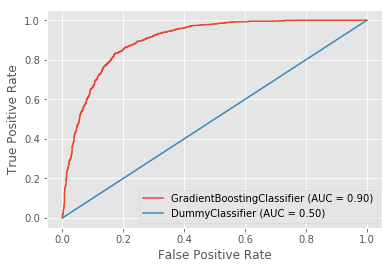

In [255]:
disp=plot_roc_curve(bank,X_teste,y_teste)
plot_roc_curve(dummy,X_teste,y_teste, ax=disp.ax_);

Comparando o resultado da curva *ROC* do *Gradiente Boosting* com da nossa *baseline* vemos a diferença do desempenho que pode ser considerado como *excelente*.

## Salvando o modelo criado

Por fim vamos salvar o nosso modelo treinado para, caso seja da nossa vontade, utilizá-lo em um *deploy* ou exportá-lo para outro computador.

In [256]:
pickle.dump(bank, open('modelo_banco.sav', 'wb'))

## Conclusão

Comparando a acurácia do modelo com validação cruzada com a sua *baseline*, vemos que o modelo foi bem sucedido em superar em muito o limite mínimo definido (82.567% > 50.32%). Além disso, o desempenho do modelo em classificar teve um ótimo resultado, se observarmos a curva *ROC* e a *AUC* que foi de 90%. Com isso concluímos o modelo usado para classificação é um bom modelo e pode ser utilizado para realizar previsões.